(Mike → Trips trip_id-calender)How this impacts our riders, customers. If you were on route A(good performing) vs route B (poor routes more Negative Aherence and Higher Hdwy_DEV), you’d be this much later to your destination.
What is "how": 
E.g. WeGo Faster? but How? 
Current is this: highlighted data: these routes, (Mariel →)operators, days etc. are relatively slow and present opportunity for improvements (getting people to where they want to be faster.) 
In order to WeGo Faster we need to understand why these (Trey) routes, (Trey) days, (Mariel)operators etc are lagging behind the average.
Present analysis on those laggards


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice, cycle

In [2]:
df_hw = pd.read_csv('processed_data.csv', index_col=False)
#df_hw.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df_hw['PERC_HDWY'] = (df_hw['HDWY_DEV']/df_hw['SCHEDULED_HDWY'])
df_hw.loc[30:100]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY
30,120230801,1,99457942,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,...,0,0.0,0,491,0.000000,0.201389,0.265092,0.297943,120230801_345120,0.201389
31,120230801,1,99457944,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,...,0,0.0,0,512,0.000000,-0.017000,-0.191032,0.572293,120230801_345120,-0.017000
32,120230801,1,99457946,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,...,1,1.0,0,522,3.316666,-0.079000,-0.623885,0.687674,120230801_345121,-0.079000
33,120230801,1,99457947,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,...,0,0.0,0,534,0.000000,-0.368056,-0.689046,0.541525,120230801_345121,-0.368056
34,120230801,1,99457949,2023-08-01,22,2200,2374,345122,0,FROM DOWNTOWN,...,0,0.0,0,551,16.100000,-0.069445,-0.188705,0.190254,120230801_345122,-0.069445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,120230801,1,99458075,2023-08-01,22,2201,2427,345228,0,FROM DOWNTOWN,...,0,0.0,0,572,0.000000,-0.081000,-0.637848,1.195350,120230801_345228,-0.081000
97,120230801,1,99458077,2023-08-01,22,2201,2427,345229,0,TO DOWNTOWN,...,1,1.0,0,582,12.200000,0.000000,-0.072347,0.687674,120230801_345229,0.000000
98,120230801,1,99458078,2023-08-01,22,2201,2427,345229,0,TO DOWNTOWN,...,0,0.0,0,594,0.000000,-0.615278,-1.103282,0.738954,120230801_345229,-0.615278
99,120230801,1,99458080,2023-08-01,22,2201,2427,345230,0,FROM DOWNTOWN,...,0,0.0,0,611,25.533333,0.343056,0.502463,-0.440495,120230801_345230,0.343056


In [45]:
pd.set_option('display.max_columns', None)

In [4]:
df_hw.value_counts('ROUTE_ABBR')

ROUTE_ABBR
56    47672
55    47402
52    35623
3     35053
50    34183
23    26899
22    16286
7     11181
dtype: int64

In [5]:
df_hw.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'HDWY_DEV_PERC', 'Z_HDWY_DEV', 'Z_ADHERENCE',
       'UNIQUE_TRIP_ID', 'PERC_HDWY'],
      dtype='object')

In [6]:
#Trips trip_id-calender)How this impacts our riders, customers. 
#If you were on route A(good performing) vs route B 
#(poor routes more Negative Aherence and Higher Hdwy_DEV)...
#Subset by route
#Then, subset by Adherence (do you need to add an average adherence
#                          column?)
#

In [7]:
#The average ADHERENCE of each trip, by TRIP_ID and CALENDAR_ID
df_hw['TRIP_CALENDAR_ID'] = df_hw['TRIP_ID'].astype(str) + "_" + df_hw['CALENDAR_ID'].astype(str)
df_hw['MEAN_ADH'] = df_hw.groupby('TRIP_CALENDAR_ID')['ADHERENCE'].transform('mean')
df_hw['MEAN_ADH'].nlargest(10)

80954     14.050000
142524    13.766666
196434    13.766666
211632    12.916666
68921     12.433333
88546     12.166666
88547     12.166666
183232    11.783333
88526      8.550000
88527      8.550000
Name: MEAN_ADH, dtype: float64

In [8]:
df_hw.iloc[6149:6152]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH
6149,120230802,1,99494249,2023-08-02,3,315,2055,346384,0,FROM DOWNTOWN,...,0,51,6.616666,-0.138333,-0.265502,0.169742,120230802_346384,-0.138333,346384_120230802,-4.813333
6150,120230802,1,99494250,2023-08-02,3,315,2055,346384,0,FROM DOWNTOWN,...,0,59,0.000000,-0.377273,-0.651811,-0.545620,120230802_346384,-0.377273,346384_120230802,-4.813333
6151,120230802,1,99494251,2023-08-02,3,315,2055,346384,0,FROM DOWNTOWN,...,0,62,0.000000,-0.540909,-0.903145,-0.337935,120230802_346384,-0.540909,346384_120230802,-4.813333


In [9]:
#explain things

In [10]:
#Show a graph that give the lowest

In [11]:
#using scheduled time vs actual time. 

In [12]:
#Lets say you ride the bus at this time.  How late will you be?
    #Subset the buses by time 6:30am-8:30am
    #How late are they, by route?
    #How early would you have to leave to get to work a five minute walk
    #from the end of the line?

#What if you chose routes that were more on time, vs less?

#What if you had to be at ___ address at 8am? How often would you be late. 

#Tie in the times, rather than ADHERENCE (Adherence is times?)
#If you took this route at 8am vs. 8pm. what is the difference...
#These routes are faster, these routes are slower
#If 
#Just save as a png. 

In [13]:
df_hw['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(df_hw['ACTUAL_ARRIVAL_TIME'])
df_hw['SCHEDULED_TIME'] = pd.to_datetime(df_hw['SCHEDULED_TIME'])
df_hw

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106,0.076190,345106_120230801,-1.272222
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106,0.056190,345106_120230801,-1.272222
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106,-0.032222,345106_120230801,-1.272222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107,-0.144444,345107_120230801,0.091667
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107,-0.258889,345107_120230801,0.091667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254294,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,0,504,7.033333,0.223889,0.865501,-0.368703,120230930_353447,0.223889,353447_120230930,-5.900000
254295,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,530,1.966666,0.163889,0.614167,-0.786638,120230930_353448,0.163889,353448_120230930,-8.524999
254296,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,539,0.000000,0.175556,0.663038,-0.758434,120230930_353448,0.175556,353448_120230930,-8.524999
254297,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,552,0.000000,0.062222,0.188296,-0.125121,120230930_353449,0.062222,353449_120230930,-13.200000


In [14]:
#df_hw['LATE_VS_EARLY'] = df_hw['SCHEDULED_TIME']-df_hw['ACTUAL_ARRIVAL_TIME']
df_hw.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,63,13.216666,0.07619,0.300000,0.274867,120230801_345106,0.07619,345106_120230801,-1.272222
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,70,0.000000,0.05619,0.202259,0.244098,120230801_345106,0.05619,345106_120230801,-1.272222


In [15]:
df_times = df_hw[(df_hw['ACTUAL_ARRIVAL_TIME'] <= '8:30:00' )]
df_times.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,63,13.216666,0.076190,0.300000,0.274867,120230801_345106,0.076190,345106_120230801,-1.272222
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,70,0.000000,0.056190,0.202259,0.244098,120230801_345106,0.056190,345106_120230801,-1.272222
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,80,0.000000,-0.032222,-0.139835,0.510757,120230801_345106,-0.032222,345106_120230801,-1.272222
3,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,97,10.800000,-0.144444,-0.374878,0.336403,120230801_345107,-0.144444,345107_120230801,0.091667
4,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,112,0.000000,-0.258889,-0.614577,0.769723,120230801_345107,-0.258889,345107_120230801,0.091667


In [16]:
df_times['MEAN_ADH'].nlargest()

80954     14.050000
142524    13.766666
196434    13.766666
68921     12.433333
20274      7.250000
Name: MEAN_ADH, dtype: float64

In [17]:
df_times['MEAN_ADH'].nsmallest()

213572   -22.075
213573   -22.075
213574   -22.075
213575   -22.075
83005    -21.250
Name: MEAN_ADH, dtype: float64

In [18]:
df_times['MEAN_ROUTE'] = df_times.groupby('ROUTE_ABBR')['ADHERENCE'].transform('mean')

C:\Users\micha\AppData\Local\Temp\ipykernel_5368\481406571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times['MEAN_ROUTE'] = df_times.groupby('ROUTE_ABBR')['ADHERENCE'].transform('mean')


In [19]:
df_times['ROUTE_ABBR'].value_counts

<bound method IndexOpsMixin.value_counts of 0         22
1         22
2         22
3         22
4         22
          ..
254253     7
254254     7
254255     7
254256     7
254257     7
Name: ROUTE_ABBR, Length: 48569, dtype: int64>

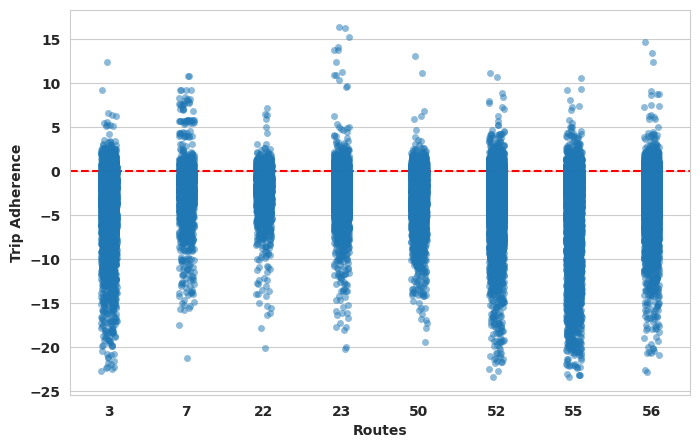

In [20]:
#Construct a bar plot that shows average ADHERENCE for each of the 8 routes, before 8:30am
# Specify the desired order for the x-axis in reverse
#desired_order = df_times["ADHERENCE"].unique()[::-1]

# Create the barplot and set the order parameter
with sns.axes_style("whitegrid"):
    plt.figure(figsize = (8,5))
    sns.stripplot(data=df_times, x="ROUTE_ABBR", y="ADHERENCE", alpha=.5)
    plt.xticks(fontsize = 10, fontweight = 'bold')
    plt.xlabel('Routes', fontsize = 10, fontweight = 'bold')
    plt.yticks(fontsize = 10, fontweight = 'bold')
    plt.ylabel('Trip Adherence', fontsize = 10, fontweight = 'bold')
    #plt.title('Routes before 8:30am, Avg. Lateness (As Adherence)', fontsize = 0, fontweight = 'bold')
    xmin, xmax = plt.xlim()
    plt.hlines(y = 0.0, xmin = xmin, xmax = xmax, linestyle = '--', color='red')
    plt.xlim(xmin, xmax);
# Display the plot
plt.show();

In [21]:

df_hw[df_hw['ADHERENCE'] < -20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH
1208,120230801,1,99460168,2023-08-01,3,311,2963,346291,0,FROM DOWNTOWN,...,0,549,0.000000,-0.341667,-0.549416,-2.589145,120230801_346291,-0.341667,346291_120230801,-15.650000
2032,120230801,1,99461888,2023-08-01,50,5005,357,347103,0,FROM DOWNTOWN,...,0,348,1.816666,0.251111,0.453593,-2.614785,120230801_347103,0.251111,347103_120230801,-15.160000
2533,120230801,1,99462652,2023-08-01,52,5214,332,347441,0,FROM DOWNTOWN,...,0,147,16.416666,0.718667,2.436339,-2.607093,120230801_347441,0.718667,347441_120230801,-5.741666
2555,120230801,1,99462678,2023-08-01,52,5214,332,347445,0,FROM DOWNTOWN,...,0,293,24.183333,0.472917,2.040721,-2.553249,120230801_347445,0.472917,347445_120230801,-3.308333
3151,120230801,1,99463451,2023-08-01,55,5505,611,347733,0,FROM DOWNTOWN,...,0,480,0.000000,1.304545,1.931344,-2.727602,120230801_347733,1.304545,347733_120230801,-15.416666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251247,120230929,1,100384787,2023-09-29,7,705,2312,353515,0,FROM DOWNTOWN,...,0,13,0.000000,0.635000,1.700954,-2.801959,120230929_353515,0.635000,353515_120230929,-14.491666
251282,120230929,1,100386749,2023-09-29,56,9975,3120,354106,0,TO DOWNTOWN,...,0,2,10.433333,inf,2.783087,-2.632733,120230929_354106,inf,354106_120230929,-20.616666
251827,120230930,2,100402584,2023-09-30,3,300,2371,350921,0,TO DOWNTOWN,...,0,349,0.000000,0.893333,2.422376,-2.625041,120230930_350921,0.893333,350921_120230930,-19.987499
253012,120230930,2,100404738,2023-09-30,52,5212,3101,352234,0,FROM DOWNTOWN,...,0,564,0.000000,0.565104,2.452629,-2.625041,120230930_352234,0.565104,352234_120230930,-14.136111


In [22]:
#Build a swarmplot of just route 23. Point out outliers...
   #Subset rows that are outliers. (The bus on 8-11 at 7:58 was over 20 minutes late... )
   #The bus on the same day, 8-11 was 15 minutes early at ...
   #
df_times[(df_times['ADHERENCE'] < -20) & (df_times['ROUTE_ABBR'] == 23)]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE
19210,120230805,2,99582244,2023-08-05,23,2312,2246,350526,0,FROM DOWNTOWN,...,1099,0.0,0.685000,2.797050,-2.568633,120230805_350526,0.685000,350526_120230805,-14.126667,-2.098893
242582,120230928,1,100347742,2023-09-28,23,2310,1147,350334,0,TO DOWNTOWN,...,258,0.0,0.752778,1.188978,-2.540429,120230928_350334,0.752778,350334_120230928,-14.016666,-2.098893


In [23]:
df_times[(df_times['ADHERENCE'] > 15) & (df_times['ROUTE_ABBR'] == 23)]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE
10381,120230803,1,99526662,2023-08-03,23,2312,2649,345647,0,TO DOWNTOWN,...,36,4.766666,0.280556,0.397741,2.872220,120230803_345647,0.280556,345647_120230803,5.033333,-2.098893
19212,120230805,2,99582251,2023-08-05,23,2313,1842,350575,0,TO DOWNTOWN,...,36,4.700000,-0.582000,-2.103963,3.036317,120230805_350575,-0.582000,350575_120230805,2.900000,-2.098893
180151,120230913,1,100693955,2023-09-13,23,2313,1368,350552,0,TO DOWNTOWN,...,100,15.916666,-0.552778,-0.998559,3.051702,120230913_350552,-0.552778,350552_120230913,3.155556,-2.098893


In [24]:
route_23 = df_times[df_times['ROUTE_ABBR'] == 23]
route_23

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE
285,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,2,12.983333,0.196667,0.339562,0.041541,120230801_345435,0.196667,345435_120230801,-2.616667,-2.098893
286,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,21,0.000000,0.030000,-0.009513,0.231278,120230801_345435,0.030000,345435_120230801,-2.616667,-2.098893
287,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,36,14.433333,0.174242,0.462902,-0.399471,120230801_345436,0.174242,345436_120230801,-3.933333,-2.098893
288,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,51,0.000000,0.043939,0.062629,0.190254,120230801_345436,0.043939,345436_120230801,-3.933333,-2.098893
289,120230801,1,99458396,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,62,0.000000,0.042424,0.057975,0.010772,120230801_345436,0.042424,345436_120230801,-3.933333,-2.098893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251673,120230930,2,100402011,2023-09-30,23,2312,3012,350507,0,TO DOWNTOWN,...,134,6.250000,-0.007639,-0.097946,0.390248,120230930_350507,-0.007639,350507_120230930,-1.672222,-2.098893
251674,120230930,2,100402012,2023-09-30,23,2312,3012,350507,0,TO DOWNTOWN,...,149,0.000000,-0.135417,-0.526144,0.182562,120230930_350507,-0.135417,350507_120230930,-1.672222,-2.098893
251675,120230930,2,100402013,2023-09-30,23,2312,3012,350507,0,TO DOWNTOWN,...,160,0.000000,-0.133333,-0.537780,0.272303,120230930_350507,-0.133333,350507_120230930,-1.672222,-2.098893
251676,120230930,2,100402015,2023-09-30,23,2312,3012,350508,0,FROM DOWNTOWN,...,165,20.433333,-0.080000,-0.351607,0.144102,120230930_350508,-0.080000,350508_120230930,-1.963333,-2.098893


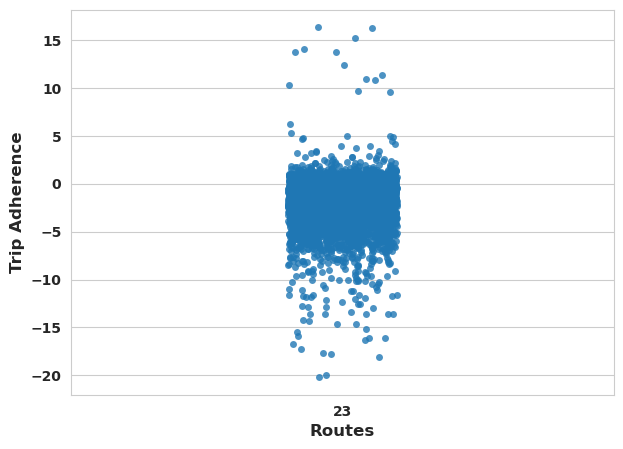

In [25]:
#Create a swarmplot that has only route 23, and highlights an outlier for late and early,
#respectively
with sns.axes_style("whitegrid"):
    plt.figure(figsize = (7,5))
    sns.stripplot(data=route_23, x="ROUTE_ABBR", y="ADHERENCE", alpha=.8)
    plt.xticks(fontsize = 10, fontweight = 'bold')
    plt.xlabel('Routes', fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 10, fontweight = 'bold')
    plt.ylabel('Trip Adherence', fontsize = 12, fontweight = 'bold')
    #plt.title('Route 23 8:30am, Avg. Lateness As Adherence', fontsize = 12, fontweight = 'bold');
    
    #plt.annotate(text = '20 minutes late!', xy = (-18,0), fontsize = 12,
    #         xytext = (-18,0 ), arrowprops=dict(facecolor='black', shrink=0.1));
    #plt.savefig('Route_23_ADH.png')    
# Display the plot
plt.show();

In [26]:
route_23.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE
285,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,2,12.983333,0.196667,0.339562,0.041541,120230801_345435,0.196667,345435_120230801,-2.616667,-2.098893
286,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,21,0.000000,0.030000,-0.009513,0.231278,120230801_345435,0.030000,345435_120230801,-2.616667,-2.098893
287,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,36,14.433333,0.174242,0.462902,-0.399471,120230801_345436,0.174242,345436_120230801,-3.933333,-2.098893
288,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,51,0.000000,0.043939,0.062629,0.190254,120230801_345436,0.043939,345436_120230801,-3.933333,-2.098893
289,120230801,1,99458396,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,62,0.000000,0.042424,0.057975,0.010772,120230801_345436,0.042424,345436_120230801,-3.933333,-2.098893


In [27]:
#How often would you be late on route 23?
#three columns
    #on time
    #subset adherence by later than 10 minutes?
    #subset by earlier than 5 minutes?

In [28]:
#route_23['15_Early'] = route_23[route_23['ADHERENCE'] > 15]['ADHERENCE'].transform('mean')
#route_23['20_Late'] = route_23[route_23['ADHERENCE'] < -20]['ADHERENCE'].transform('mean')
#route_23.iloc[20:23]

In [29]:
route_23.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE
285,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,2,12.983333,0.196667,0.339562,0.041541,120230801_345435,0.196667,345435_120230801,-2.616667,-2.098893
286,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,21,0.000000,0.030000,-0.009513,0.231278,120230801_345435,0.030000,345435_120230801,-2.616667,-2.098893
287,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,36,14.433333,0.174242,0.462902,-0.399471,120230801_345436,0.174242,345436_120230801,-3.933333,-2.098893
288,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,51,0.000000,0.043939,0.062629,0.190254,120230801_345436,0.043939,345436_120230801,-3.933333,-2.098893
289,120230801,1,99458396,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,62,0.000000,0.042424,0.057975,0.010772,120230801_345436,0.042424,345436_120230801,-3.933333,-2.098893


In [30]:
layer2_adherence = route_23[route_23['ADHERENCE'] > 5]
layer1_adherence = route_23[(route_23['ADHERENCE'] < 5) & (route_23['ADHERENCE'] > -5)]
negative_adherence = route_23[(route_23['ADHERENCE'] < -5)]
                               
#Calculate statistics for both subsets
positive_stats = layer2_adherence['ADHERENCE'].describe()
neutral_stats = layer1_adherence['ADHERENCE'].describe()
negative_stats = negative_adherence['ADHERENCE'].describe()
#Create a DataFrame with the combined statistics
Headway_stats = pd.DataFrame({
    'ADHERENCE': ['5 Minutes Early', 'Between 5 and -5', '5 Minutes Late'],
    'Count': [positive_stats['count'], neutral_stats['count'], negative_stats['count']],
    'Mean': [positive_stats['mean'], neutral_stats['mean'], negative_stats['mean']],
   # 'Std Dev': [positive_stats['std'], neutral_stats['std'], negative_stats['std']],
    'Min': [positive_stats['min'], neutral_stats['min'], negative_stats['min']],
    '25%': [positive_stats['25%'], neutral_stats['25%'], negative_stats['25%']],
   # '50%': [positive_stats['50%'], neutral_stats['50%'], negative_stats['50%']],
    '75%': [positive_stats['75%'], neutral_stats['75%'], negative_stats['75%']],
    'Max': [positive_stats['max'], neutral_stats['max'], negative_stats['max']]
})
#If you were going to add a column to this that was the percentage of 5 mins late, it would be 
# 'Percentage of total': [positive_stats['max']/positive_stats['count'], neutral_stats['mean']/ neutral_stats['count'],
##plt.savefig('Adherence_crosstab.png'); This does not save a png of below file...
#Display the DataFrame
Headway_stats

,ADHERENCE,Count,Mean,Min,25%,75%,Max
0,5 Minutes Early,15.0,11.725555,5.300000,9.991667,13.908333,16.333333
1,Between 5 and -5,4409.0,-1.544847,-4.983333,-2.650000,-0.383333,4.966666
2,5 Minutes Late,541.0,-6.976063,-20.200000,-7.366666,-5.350000,-5.016666


In [31]:
#Finally what you can see here, I've binned each trip for route 23 into roughly 

In [32]:
route_23.shape

(4969, 38)

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(df_hw['ROUTE_ABBR'], kde=True, ax=axis[0,0])
sns.histplot(df_hw['ADHERENCE'], kde=True, ax=axis[0,1])
sns.histplot(df_hw['ACTUAL_HDWY'], kde=True, ax=axis[1,0])
sns.histplot(df_hw['HDWY_DEV'], kde=True, ax=axis[1,1])

plt.show()

In [33]:
#Is this section of analysis for all days or just weekdays?
## You might see how it looks if you adjust the alpha value (DONE!)
## since there are so many points on the plot. 
###Make the labels a little bit larger. (DONE!)
##I like drilling down into the individual routes, like you did for route 23. You might consider figuring out, 
###for example, what percentage of trips or on what percentage of days the bus was more than 5 minutes late. 
###This would be basically what you did on the summary table on slide 16 but done at the trip level instead of the 
#stop level.
##You might also highlight the times when it was too early as well, since if a rider shows up on time and the bus 
###already left, they have to wait until the next one comes.

In [ ]:
route_23.sample(n=2, random_state=4)

In [39]:
route_23['DATE'] = pd.to_datetime(route_23['DATE'])
route_23['DAY_OF_WEEK'] = route_23['DAY_OF_WEEK'].astype(int)
route_23.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 285 to 251745
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CALENDAR_ID                4969 non-null   int64         
 1   SERVICE_ABBR               4969 non-null   int64         
 2   ADHERENCE_ID               4969 non-null   int64         
 3   DATE                       4969 non-null   datetime64[ns]
 4   ROUTE_ABBR                 4969 non-null   int64         
 5   BLOCK_ABBR                 4969 non-null   int64         
 6   OPERATOR                   4969 non-null   int64         
 7   TRIP_ID                    4969 non-null   int64         
 8   OVERLOAD_ID                4969 non-null   int64         
 9   ROUTE_DIRECTION_NAME       4969 non-null   object        
 10  TIME_POINT_ABBR            4969 non-null   object        
 11  ROUTE_STOP_SEQUENCE        4969 non-null   float64       
 12  TR

C:\Users\micha\AppData\Local\Temp\ipykernel_5368\3691942966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_23['DATE'] = pd.to_datetime(route_23['DATE'])
C:\Users\micha\AppData\Local\Temp\ipykernel_5368\3691942966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_23['DAY_OF_WEEK'] = route_23['DAY_OF_WEEK'].astype(int)


In [46]:
#what percentage of trips or on what percentage of days the bus was more than 5 minutes late.
percentage_days = route_23[(route_23['ADHERENCE'] <= -5)].groupby('DAY_OF_WEEK')
percentage_days.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE,DAY_OF_WEEK
287,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-11-13 05:25:00,2023-11-13 05:16:40,05:31:06,-6.100000,22.0,25.833333,3.833333,0,1,0,0,0.0,0,36,14.433333,0.174242,0.462902,-0.399471,120230801_345436,0.174242,345436_120230801,-3.933333,-2.098893,2
290,120230801,1,99458398,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-11-13 06:00:00,2023-11-13 05:51:57,06:05:01,-5.016666,20.0,23.016666,3.016666,0,0,1,0,0.0,0,67,13.066666,0.150833,0.348870,-0.232810,120230801_345437,0.150833,345437_120230801,-4.861111,-2.098893,2
5044,120230802,1,99492283,2023-08-02,23,2300,1893,345436,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-11-13 05:25:00,2023-11-13 05:16:51,05:31:12,-6.200000,22.0,23.733333,1.733333,0,1,0,0,0.0,0,36,14.350000,0.078788,0.169679,-0.414855,120230802_345436,0.078788,345436_120230802,-4.194444,-2.098893,3
5049,120230802,1,99492289,2023-08-02,23,2300,1893,345437,0,FROM DOWNTOWN,DKTL,4.0,0,36.205694,-86.768557,2023-11-13 06:13:00,2023-11-13 06:18:11,06:18:11,-5.183333,21.0,24.566666,3.566666,0,0,1,0,0.0,0,82,0.000000,0.169841,0.425667,-0.258450,120230802_345437,0.169841,345437_120230802,-4.200000,-2.098893,3
10024,120230803,1,99526152,2023-08-03,23,2300,1716,345438,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-11-13 06:37:00,2023-11-13 06:23:35,06:42:15,-5.250000,12.0,16.766666,4.766666,0,0,1,0,0.0,0,97,18.666666,0.397222,0.593223,-0.268706,120230803_345438,0.397222,345438_120230803,-1.566667,-2.098893,4
10030,120230803,1,99526160,2023-08-03,23,2300,1716,345440,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-11-13 07:49:00,2023-11-13 07:34:29,07:54:03,-5.050000,12.0,14.316666,2.316666,0,0,1,0,0.0,0,158,19.566666,0.193055,0.251129,-0.237938,120230803_345440,0.193056,345440_120230803,-1.155556,-2.098893,4
14692,120230804,1,99559846,2023-08-04,23,2300,1893,350267,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-11-13 05:25:00,2023-11-13 05:16:53,05:30:53,-5.883333,22.0,28.316666,6.316666,0,0,1,0,0.0,0,36,14.000000,0.287121,0.809649,-0.366139,120230804_350267,0.287121,350267_120230804,-5.883333,-2.098893,5
14861,120230804,1,99560131,2023-08-04,23,2310,1147,350335,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-11-13 08:15:00,2023-11-13 08:04:15,08:20:19,-5.316666,12.0,16.350000,4.350000,0,0,1,0,0.0,0,263,16.066666,0.362500,0.535044,-0.278962,120230804_350335,0.362500,350335_120230804,-2.823333,-2.098893,5
18978,120230805,2,99581853,2023-08-05,23,2310,1582,350359,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-11-13 07:31:00,2023-11-13 07:36:44,07:36:44,-5.733333,25.0,27.616666,2.616666,0,0,1,0,0.0,0,160,0.000000,0.104667,0.293018,-0.343063,120230805_350359,0.104667,350359_120230805,-3.333333,-2.098893,6
18981,120230805,2,99581857,2023-08-05,23,2310,1582,350360,0,FROM DOWNTOWN,DKTL,4.0,0,36.205694,-86.768557,2023-11-13 08:06:00,2023-11-13 08:11:10,08:11:10,-5.166666,25.0,26.916666,1.916666,0,0,1,0,0.0,0,180,0.000000,0.076667,0.195277,-0.255886,120230805_350360,0.076667,350360_120230805,-5.343333,-2.098893,6


In [37]:
route_23['DAY_OF_WEEK'] = route_23['DATE'].dt.isocalendar().day

C:\Users\micha\AppData\Local\Temp\ipykernel_5368\2929618379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_23['DAY_OF_WEEK'] = route_23['DATE'].dt.isocalendar().day


In [38]:
route_23.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PERC_HDWY,TRIP_CALENDAR_ID,MEAN_ADH,MEAN_ROUTE,DAY_OF_WEEK
285,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,12.983333,0.196667,0.339562,0.041541,120230801_345435,0.196667,345435_120230801,-2.616667,-2.098893,2
286,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,0.000000,0.030000,-0.009513,0.231278,120230801_345435,0.030000,345435_120230801,-2.616667,-2.098893,2
287,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,14.433333,0.174242,0.462902,-0.399471,120230801_345436,0.174242,345436_120230801,-3.933333,-2.098893,2
288,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,0.000000,0.043939,0.062629,0.190254,120230801_345436,0.043939,345436_120230801,-3.933333,-2.098893,2
289,120230801,1,99458396,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,0.000000,0.042424,0.057975,0.010772,120230801_345436,0.042424,345436_120230801,-3.933333,-2.098893,2


In [56]:
###for example, what percentage of trips or on what percentage of days the bus was more than 5 minutes late. 
###This would be basically what you did on the summary table on slide 16 but done at the trip level instead of the 
#stop level.
#route_23[(route_23['ADHERENCE'] <= -5)]
#Create a summary table that has days of the week listed in the first column, then summary stats after...
# You'll need to convert to date time, then pull out days of the week...
layer6_adherence = route_23[route_23['DAY_OF_WEEK'] == 6] #Saturday goes here...
layer5_adherence = route_23[route_23['DAY_OF_WEEK'] == 5]
layer4_adherence = route_23[route_23['DAY_OF_WEEK'] == 4]
layer3_adherence = route_23[route_23['DAY_OF_WEEK'] == 3]
layer2_adherence = route_23[route_23['DAY_OF_WEEK'] == 2] #8-1-2023 is a Tuesday. Tues == 2
layer1_adherence = route_23[route_23['DAY_OF_WEEK'] == 1] #Monday == to layer1, below
layer0_adherence = route_23[route_23['DAY_OF_WEEK'] == 7] #Sunday goes here
                               
#Calculate statistics for both subsets
Sunday_stats = layer0_adherence['ADHERENCE'].describe()
Monday_stats = layer1_adherence['ADHERENCE'].describe()
Tuesday_stats = layer2_adherence['ADHERENCE'].describe()
Wednesday_stats = layer3_adherence['ADHERENCE'].describe()
Thursday_stats = layer4_adherence['ADHERENCE'].describe()
Friday_stats = layer5_adherence['ADHERENCE'].describe()
Saturday_stats = layer6_adherence['ADHERENCE'].describe()

#Create a DataFrame with the combined statistics
Days_stats = pd.DataFrame({
   'Days Of The Week': [ 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
   'Count': [Saturday_stats['count'], Sunday_stats['count'], Monday_stats['count'], Tuesday_stats['count'], Wednesday_stats['count'], Thursday_stats['count'], Friday_stats['count']],
   #'Mean': [Saturday_stats['mean'], Sunday_stats['mean'], Monday_stats['mean'], Tuesday_stats['mean'], Wednesday_stats['mean'], Thursday_stats['mean'], Friday_stats['mean']],
   #'Std Dev': [positive_stats['std'], neutral_stats['std'], negative_stats['std']],
   'Min': [Saturday_stats['min'], Sunday_stats['min'], Monday_stats['min'], Tuesday_stats['min'], Wednesday_stats['min'], Thursday_stats['min'], Friday_stats['min']],
   '25%': [Saturday_stats['25%'], Sunday_stats['25%'], Monday_stats['25%'], Tuesday_stats['25%'], Wednesday_stats['25%'], Thursday_stats['25%'], Friday_stats['25%']],
   '50%': [Saturday_stats['50%'], Sunday_stats['50%'], Monday_stats['50%'], Tuesday_stats['50%'], Wednesday_stats['50%'], Thursday_stats['50%'], Friday_stats['50%']],
   #'75%': [Saturday_stats['75%'], Sunday_stats['75%'], Monday_stats['75%'], Tuesday_stats['75%'], Wednesday_stats['75%'], Thursday_stats['75%'], Friday_stats['75%']],
   'Max': [Saturday_stats['max'], Sunday_stats['max'], Monday_stats['max'], Tuesday_stats['max'], Wednesday_stats['max'], Thursday_stats['max'], Friday_stats['max']],
})

#Display the DataFrame
Days_stats


,Days Of The Week,Count,Min,25%,50%,Max
0,Saturday,444.0,-20.200000,-3.441666,-1.641666,16.233333
1,Sunday,158.0,-9.800000,-2.475000,-0.983333,14.050000
2,Monday,753.0,-12.833333,-3.450000,-1.833333,13.766666
3,Tuesday,940.0,-17.733333,-3.583333,-1.966666,10.866666
4,Wednesday,965.0,-15.483333,-3.583333,-2.116666,16.333333
5,Thursday,850.0,-20.016666,-2.779166,-1.416666,15.166666
6,Friday,859.0,-18.100000,-3.191667,-1.600000,11.300000


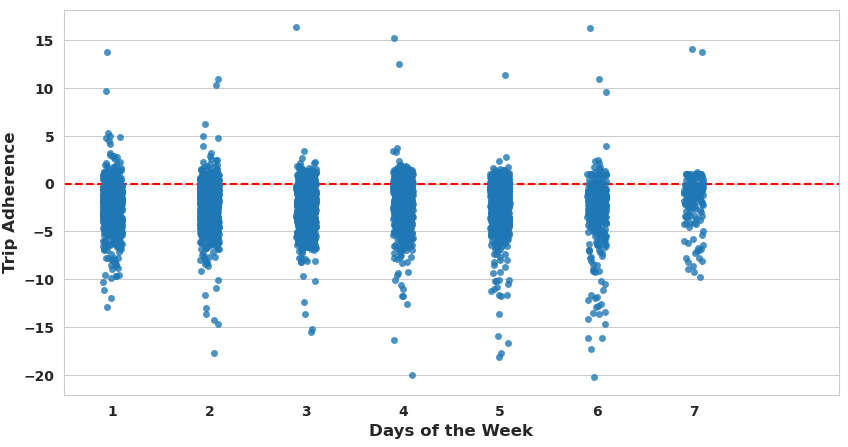

In [48]:
#Create a swarmplot that has only route 23, and highlights an outlier for late and early,
#respectively
with sns.axes_style("whitegrid"):
    plt.figure(figsize = (10,5))
    sns.stripplot(data=route_23, x="DAY_OF_WEEK", y="ADHERENCE", alpha=.8)
    plt.xticks(fontsize = 10, fontweight = 'bold')
    plt.xlabel('Days of the Week', fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 10, fontweight = 'bold')
    plt.ylabel('Trip Adherence', fontsize = 12, fontweight = 'bold')
    #plt.title('Route 23 8:30am, Avg. Lateness As Adherence', fontsize = 12, fontweight = 'bold');
    
    #plt.annotate(text = '20 minutes late!', xy = (-18,0), fontsize = 12,
    #         xytext = (-18,0 ), arrowprops=dict(facecolor='black', shrink=0.1));
    plt.savefig('Route_23_ADH_day_of_the_week.png')    
    plt.hlines(y = 0.0, xmin = xmin, xmax = xmax, linestyle = '--', color='red')
    plt.xlim(xmin, xmax);
# Display the plot
plt.show();

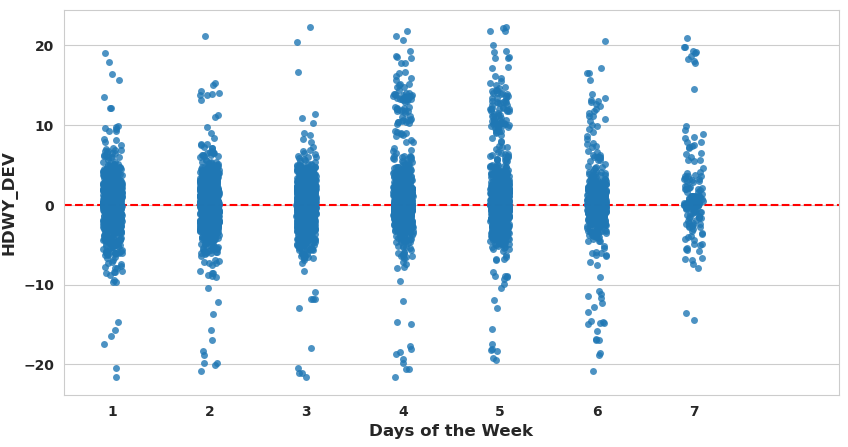

In [49]:
#Create a swarmplot that has only route 23, and highlights an outlier for late and early,
#respectively
with sns.axes_style("whitegrid"):
    plt.figure(figsize = (10,5))
    sns.stripplot(data=route_23, x="DAY_OF_WEEK", y="HDWY_DEV", alpha=.8)
    plt.xticks(fontsize = 10, fontweight = 'bold')
    plt.xlabel('Days of the Week', fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 10, fontweight = 'bold')
    plt.ylabel('HDWY_DEV', fontsize = 12, fontweight = 'bold')
    #plt.title('Route 23 8:30am, Avg. Lateness As Adherence', fontsize = 12, fontweight = 'bold');
    
    #plt.annotate(text = '20 minutes late!', xy = (-18,0), fontsize = 12,
    #         xytext = (-18,0 ), arrowprops=dict(facecolor='black', shrink=0.1));
    plt.savefig('Route_23_HDWY_DEV_day_of_the_week.png')    
    plt.hlines(y = 0.0, xmin = xmin, xmax = xmax, linestyle = '--', color='red')
    plt.xlim(xmin, xmax);
# Display the plot
plt.show();